In [1]:
%pip install numpy matplotlib pennylane

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane.templates import QuantumPhaseEstimation
from pennylane import numpy as np

[[-0.4330127+0.j]
 [ 0.25     +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.4330127+0.j]
 [ 0.75     +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]]
[0.11111111+0.j]


(<Figure size 1300x500 with 1 Axes>, <Axes: >)

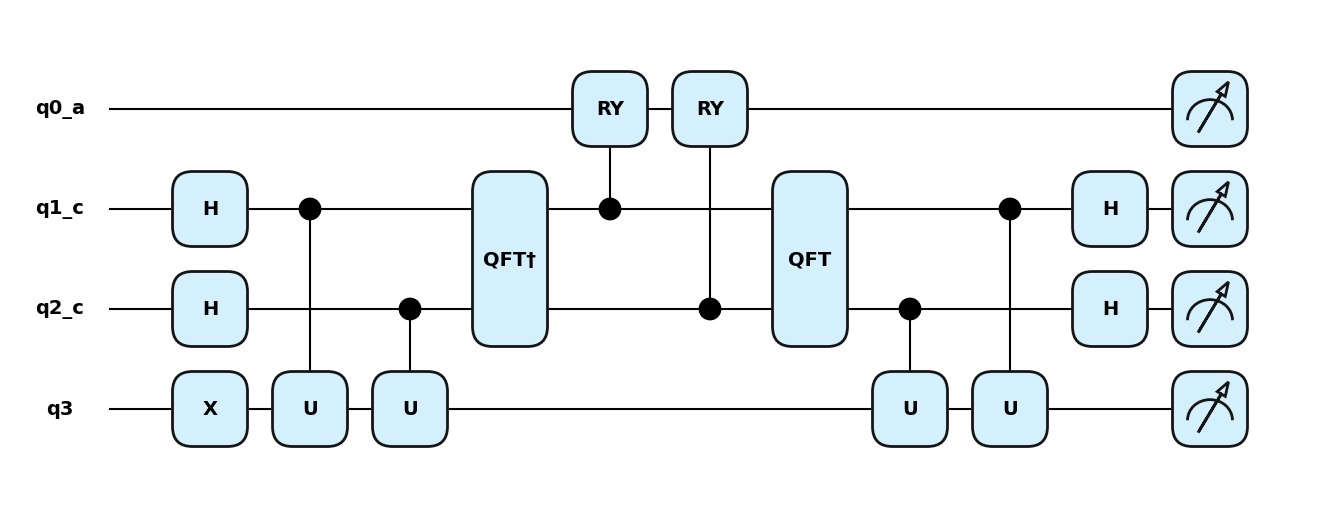

In [3]:
# Given vector, b and Hermitian matrix A
b = np.array([0, 1])
A = np.array([[1, -1/3], [-1/3, 1]])

U = 0.5*(np.array([[-1+1j, 1+1j],[1+1j, -1+1j]]))
U_2 = np.array([[0, -1], [-1, 0]])

U_inv =  0.5*(np.array([[-1-1j, 1-1j],[1-1j, -1-1j]]))
U_inv_2 = U_2


# Define the quantum device
num_wires = 4
dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'
t = 3*np.pi/4   # You can set t to any value

dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'


@qml.qnode(dev)
def circuit(ancilla_wire, clock_wires, input_wire):
    qml.PauliX(input_wire)
    # qml.QuantumPhaseEstimation(
    #     U,
    #     target_wires=input_wire,
    #     estimation_wires=clock_wires,
    # )

    # QPE
    for w in clock_wires:
        qml.Hadamard(w)

    qml.ControlledQubitUnitary(U_2, control_wires=clock_wires[0], wires=input_wire)
    qml.ControlledQubitUnitary(U, control_wires=clock_wires[1], wires=input_wire)
    qml.adjoint(qml.QFT)(wires = clock_wires)

    # RY
    qml.CRY(np.pi/3, wires=[clock_wires[0], ancilla_wire])
    qml.CRY(np.pi, wires=[clock_wires[1], ancilla_wire])

    qml.QFT(wires=clock_wires)
    qml.ControlledQubitUnitary(U_inv, control_wires=clock_wires[1], wires=input_wire)
    qml.ControlledQubitUnitary(U_inv_2, control_wires=clock_wires[0], wires=input_wire)

    for w in clock_wires:
        qml.Hadamard(w)

    return qml.state()

result = circuit(ancilla_wire, clock_wires, input_wire)
column_vector = result.reshape(-1, 1)


print(column_vector)
print(column_vector[1]**2/column_vector[9]**2)
# print(circuit(ancilla_wire, clock_wires, input_wire))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(ancilla_wire, clock_wires, input_wire)

[[ 5.96284794e-01+0.j]
 [ 5.27046277e-01+0.j]
 [ 0.00000000e+00+0.j]
 [-5.55111512e-17+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 5.96284794e-01+0.j]
 [-1.05409255e-01+0.j]
 [ 0.00000000e+00+0.j]
 [-2.77555756e-17+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]]
beans
[-5.]


(<Figure size 1300x500 with 1 Axes>, <Axes: >)

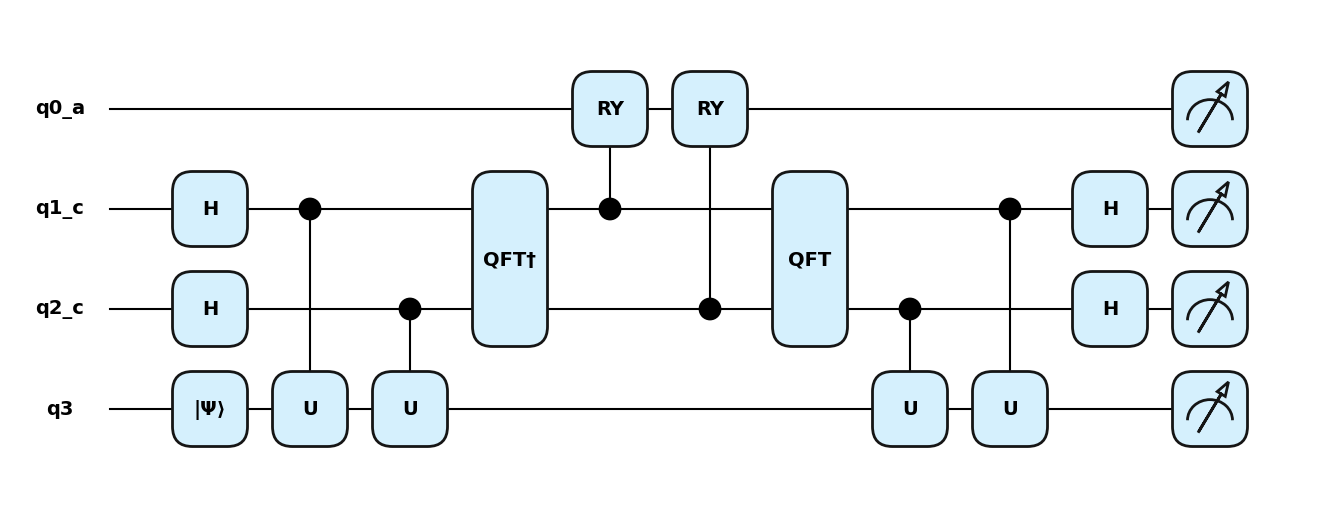

In [19]:
# Given vector, b and Hermitian matrix A
b = np.array([3/2, 1/2])
b = b / np.linalg.norm(b)
A = np.array([[1, 1/2], [1/2, 1]])

U = (np.array([[0, -1j],[-1j, 0]]))
U_2 = np.array([[-1, 0], [0, -1]])

U_inv =  (np.array([[0, 1j],[1j, 0]]))
U_inv_2 = np.array([[-1, 0], [0, -1]])

theta = 2 * np.arccos(b[0])
# Define the quantum device
num_wires = 4
dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'
t = np.pi   # You can set t to any value

dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'


@qml.qnode(dev)
def circuit(ancilla_wire, clock_wires, input_wire):
    qml.QubitStateVector(b, wires=input_wire)
    # QPE
    for w in clock_wires:
        qml.Hadamard(w)

    qml.ControlledQubitUnitary(U_2, control_wires=clock_wires[0], wires=input_wire)
    qml.ControlledQubitUnitary(U, control_wires=clock_wires[1], wires=input_wire)
    qml.adjoint(qml.QFT)(wires = clock_wires)

    # RY
    qml.CRY(2*np.arcsin(1/3) -np.pi, wires=[clock_wires[0], ancilla_wire])
    qml.CRY(np.pi , wires=[clock_wires[1], ancilla_wire])

    # Inverse QPE
    qml.QFT(wires=clock_wires)
    qml.ControlledQubitUnitary(U_inv, control_wires=clock_wires[1], wires=input_wire)
    qml.ControlledQubitUnitary(U_inv_2, control_wires=clock_wires[0], wires=input_wire)

    for w in clock_wires:
        qml.Hadamard(w)

    return qml.state()

result = circuit(ancilla_wire, clock_wires, input_wire)
column_vector = result.reshape(-1, 1)


print(column_vector)
print("beans")
print(column_vector[1].real/column_vector[9].real)
# print(circuit(ancilla_wire, clock_wires, input_wire))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(ancilla_wire, clock_wires, input_wire)

In [15]:
# Solve the system classically and compare ratio
classical_result = np.linalg.solve(A,b)
print(classical_result)
print(classical_result[0]/classical_result[1])

[ 1.05409255 -0.21081851]
-5.000000000000001
